In [32]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [33]:
df = pd.read_excel('dataset.xlsx', index=None)
df.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
0,2019-05-02,5BDN21B,11009,121000.0
1,2019-05-02,5BDN21B,14120,928200.0
2,2019-05-02,5BDN21B,16109,1452000.0
3,2019-05-02,5BDN21B,16140,-40600.0
4,2019-05-02,5BDN21B,62004,10000.0


In [34]:
df_grp = df.groupby(['SEDOL', 'BusinessDate']).sum()
df_grp

Position_Quantity_SD
SEDOL   BusinessDate                      
5BDN21B 2019-05-02               2254208.0
        2019-05-03               2249508.0
        2019-05-06               2303108.0
        2019-05-07               2206708.0
        2019-05-08               2188708.0
...                                    ...
74ZI41B 2019-09-04               3913907.0
        2019-09-05               3677907.0
        2019-09-06               3713907.0
        2019-09-09               1874907.0
        2019-09-10               2195907.0

[470 rows x 1 columns]

In [35]:
names=df.SEDOL.unique().tolist()
names

['5BDN21B', '5MJ2C1B', '6NY9V1B', '6Y3RH2B', '74ZI41B']

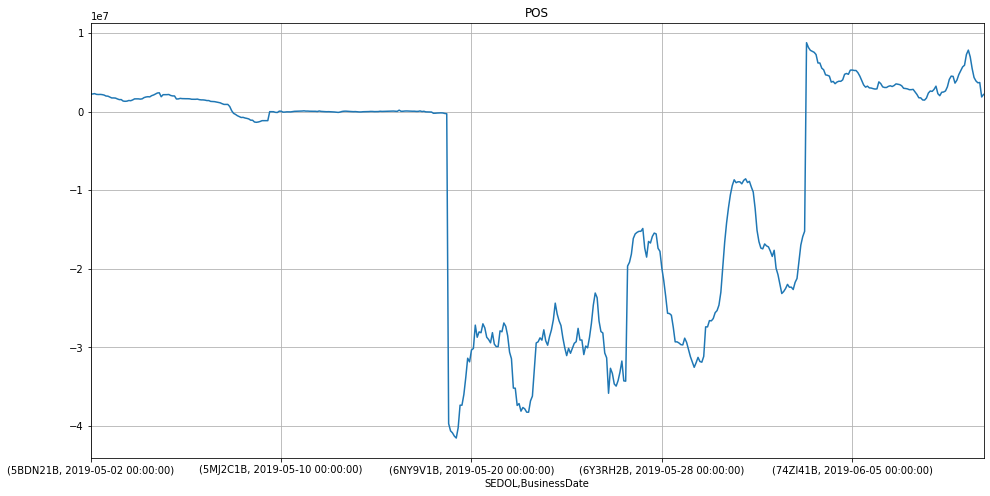

In [36]:
df_grp['Position_Quantity_SD'].plot.line(label='BC', figsize=(16,8), title='POS', grid=True)

In [39]:
df_sedol3 = df.loc[df.SEDOL=='6NY9V1B']
df_sedol3.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
32,2019-05-02,6NY9V1B,0130V,346000.0
33,2019-05-02,6NY9V1B,10240,-511000.0
34,2019-05-02,6NY9V1B,10240,-3281000.0
35,2019-05-02,6NY9V1B,10321,336530.0
36,2019-05-02,6NY9V1B,11009,964.0


In [40]:
df_sedol4 = df.loc[df.SEDOL=='6Y3RH2B']
df_sedol4.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
64,2019-05-02,6Y3RH2B,10240,-112000.0
65,2019-05-02,6Y3RH2B,10240,-373000.0
66,2019-05-02,6Y3RH2B,10321,173000.0
67,2019-05-02,6Y3RH2B,1310P,-202000.0
68,2019-05-02,6Y3RH2B,1310V,520000.0


In [41]:
df_sedol5 = df.loc[df.SEDOL=='74ZI41B']
df_sedol5.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
87,2019-05-02,74ZI41B,1003V,697000.0
88,2019-05-02,74ZI41B,10240,4000.0
89,2019-05-02,74ZI41B,10240,557000.0
90,2019-05-02,74ZI41B,10321,433000.0
91,2019-05-02,74ZI41B,12210,164000.0


## SEDOL1

In [55]:
df_sedol1 = df.loc[df.SEDOL=='5BDN21B']
df_sedol1.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
0,2019-05-02,5BDN21B,11009,121000.0
1,2019-05-02,5BDN21B,14120,928200.0
2,2019-05-02,5BDN21B,16109,1452000.0
3,2019-05-02,5BDN21B,16140,-40600.0
4,2019-05-02,5BDN21B,62004,10000.0


In [45]:
df_sedol1_edit = df_sedol1.groupby(['BusinessDate']).sum()
df_sedol1_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,2254208.0
2019-05-03,2249508.0
2019-05-06,2303108.0
2019-05-07,2206708.0
2019-05-08,2188708.0


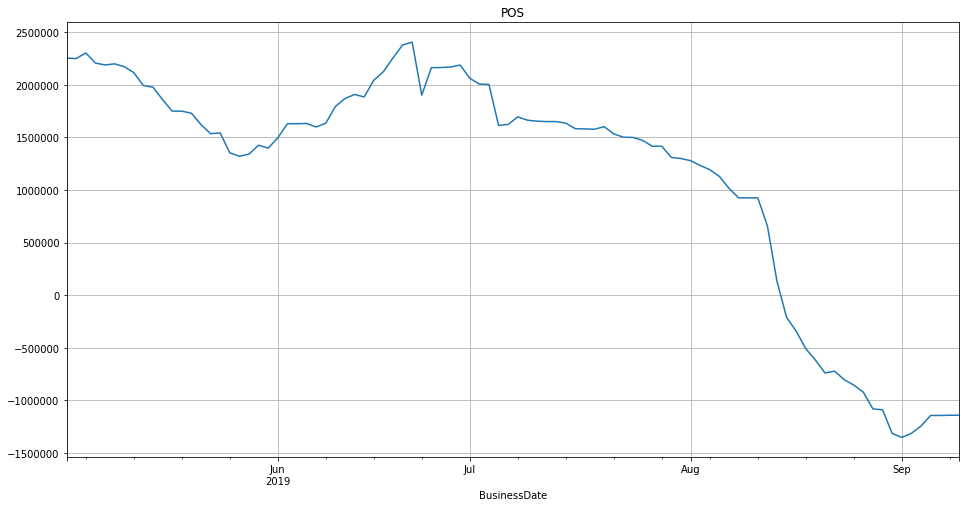

In [46]:
df_sedol1_edit['Position_Quantity_SD'].plot.line(label='SEDOL1', figsize=(16,8), title='POS', grid=True)

In [47]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol1_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [48]:
data = df_sedol1_edit['Position_Quantity_SD'].values[indices]
data

array([[ 2254208.,  2249508.,  2303108., ...,  1793908.,  1869608.,
         1908308.],
       [ 2249508.,  2303108.,  2206708., ...,  1869608.,  1908308.,
         1884608.],
       [ 2303108.,  2206708.,  2188708., ...,  1908308.,  1884608.,
         2043008.],
       ...,
       [ 1416208.,  1416208.,  1309208., ..., -1244092., -1143592.,
        -1143592.],
       [ 1416208.,  1309208.,  1299108., ..., -1143592., -1143592.,
        -1141192.],
       [ 1309208.,  1299108.,  1279008., ..., -1143592., -1141192.,
        -1141192.]])

In [49]:
X = data[:, :-1]
y = data[:, -1]

In [50]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [51]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

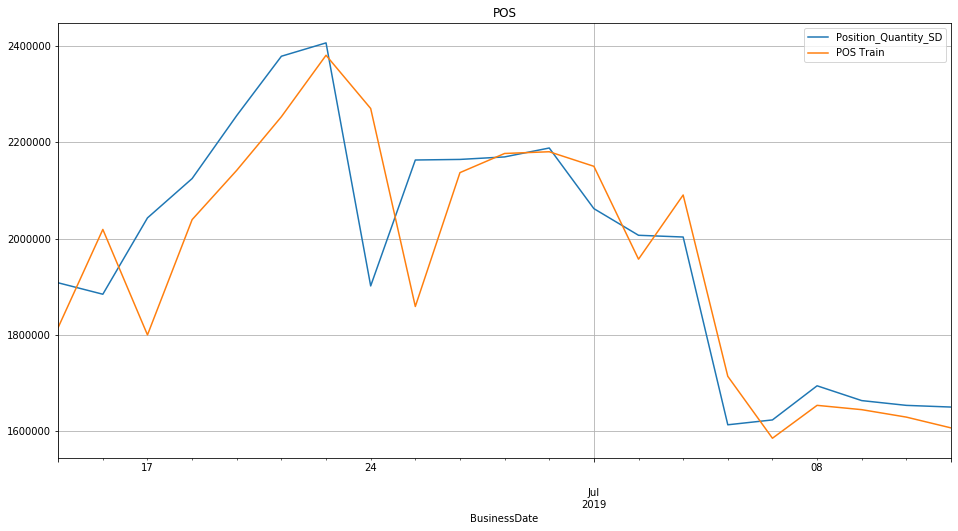

In [53]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol1_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

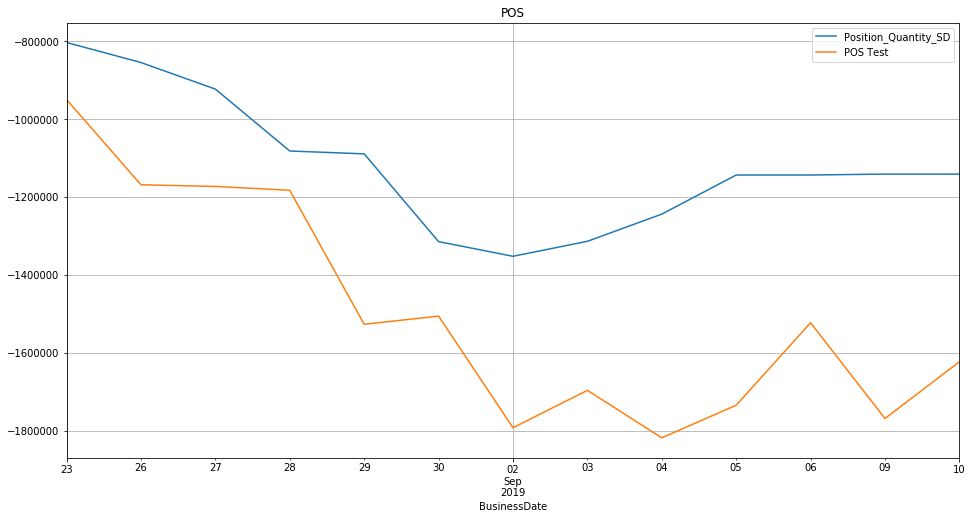

In [58]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol1_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [60]:
from sklearn.linear_model import Ridge

#Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

#Inferences
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

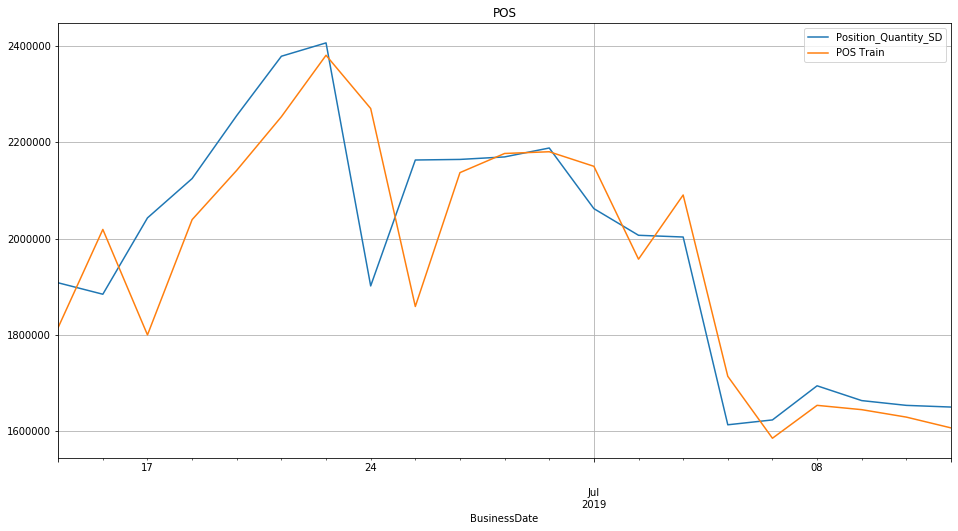

In [61]:
#Plot the graph for it has trained on the training data
df_ridge = df_sedol1_edit.copy()
df_ridge = df_ridge.iloc[window:split_indices]
df_ridge['POS Train'] = y_pred_train_ridge[:-window]
df_ridge.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

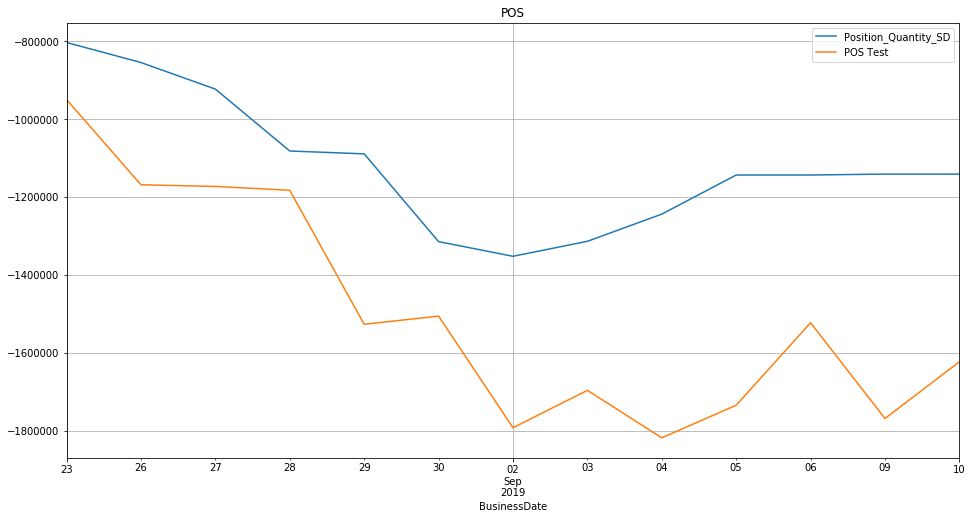

In [63]:
#Plot the graph for it has trained on the training data
df_ridge = df_sedol1_edit.copy()
df_ridge = df_ridge.iloc[split_indices+window:]
df_ridge['POS Test'] = y_pred_ridge
df_ridge.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

#Train
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

#Inferences
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

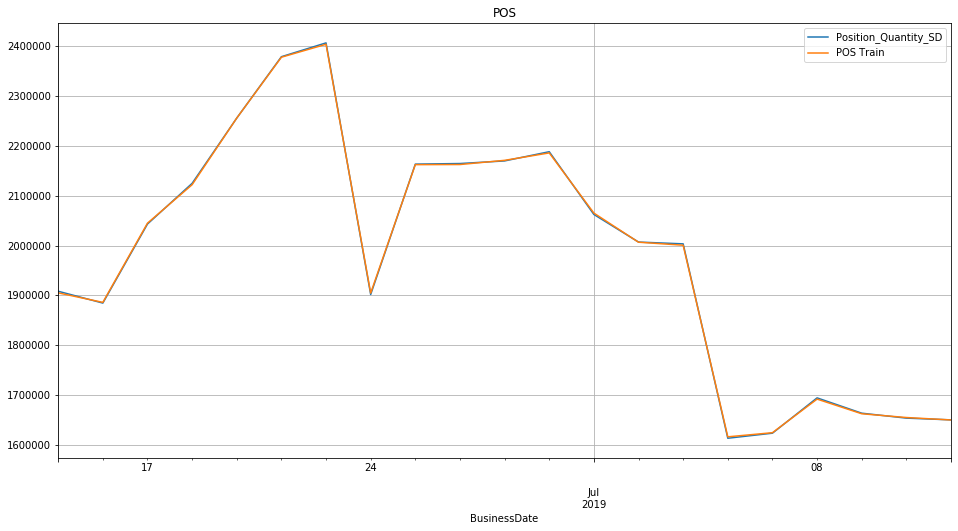

In [65]:
#Plot the graph for it has trained on the training data
df_gb = df_sedol1_edit.copy()
df_gb = df_gb.iloc[window:split_indices]
df_gb['POS Train'] = y_pred_train_gb[:-window]
df_gb.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

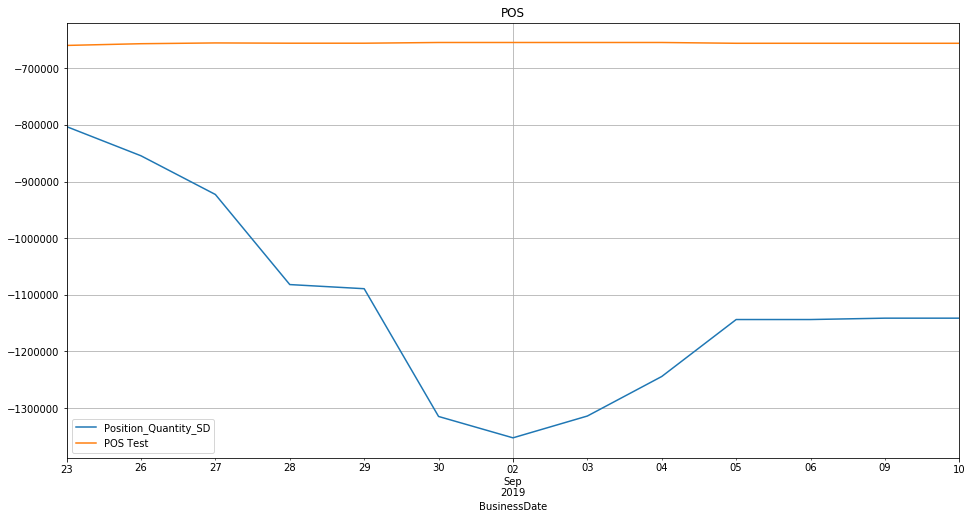

In [66]:
#Plot the graph for it has trained on the training data
df_gb = df_sedol1_edit.copy()
df_gb = df_gb.iloc[split_indices+window:]
df_gb['POS Test'] = y_pred_gb
df_gb.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [70]:
df_sedol1_edit['rolling_mean'] = df_sedol1_edit.Position_Quantity_SD.rolling(window=30).mean()
df_sedol1_edit.tail()

,Position_Quantity_SD,rolling_mean
BusinessDate,,
2019-09-04,-1244092.0,107194.666667
2019-09-05,-1143592.0,20021.333333
2019-09-06,-1143592.0,-65305.333333
2019-09-09,-1141192.0,-150552.000000
2019-09-10,-1141192.0,-232232.000000


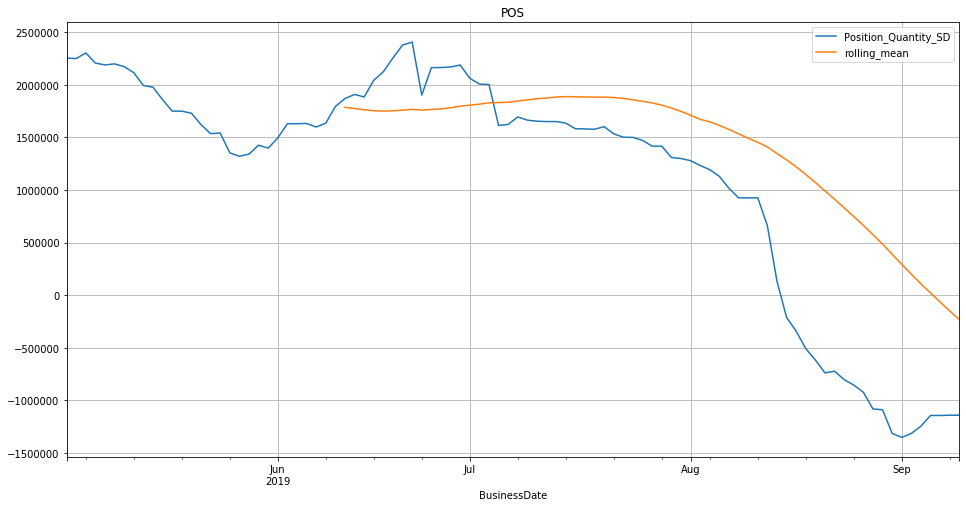

In [71]:
df_sedol1_edit.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [73]:
df_sedol1_edit['exp1'] = df_sedol1_edit.Position_Quantity_SD.ewm(span=30, adjust=False).mean()
df_sedol1_edit.tail()

,Position_Quantity_SD,rolling_mean,exp1
BusinessDate,,,
2019-09-04,-1244092.0,107194.666667,-145711.038973
2019-09-05,-1143592.0,20021.333333,-210090.455814
2019-09-06,-1143592.0,-65305.333333,-270316.361890
2019-09-09,-1141192.0,-150552.000000,-326501.886930
2019-09-10,-1141192.0,-232232.000000,-379062.539386


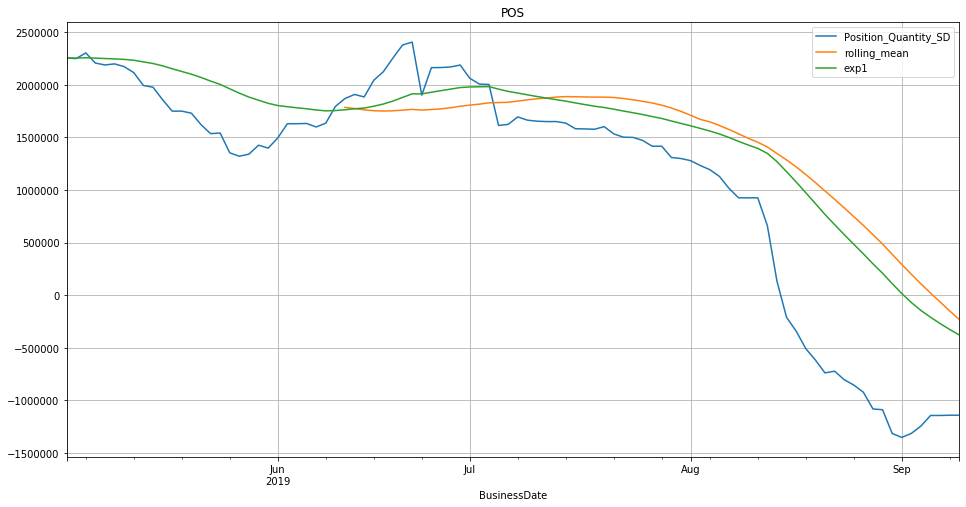

In [74]:
df_sedol1_edit.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

## SEDOL2

In [38]:
df_sedol2 = df.loc[df.SEDOL=='5MJ2C1B']
df_sedol2.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
8,2019-05-02,5MJ2C1B,0010V,200.0
9,2019-05-02,5MJ2C1B,1003V,100.0
10,2019-05-02,5MJ2C1B,12280,10000.0
11,2019-05-02,5MJ2C1B,25SJP,-200.0
12,2019-05-02,5MJ2C1B,3210P,-151400.0


In [76]:
df_sedol2_edit = df_sedol2.groupby(['BusinessDate']).sum()
df_sedol2_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,732.0
2019-05-03,732.0
2019-05-06,-4902.0
2019-05-07,-85468.0
2019-05-08,-102202.0


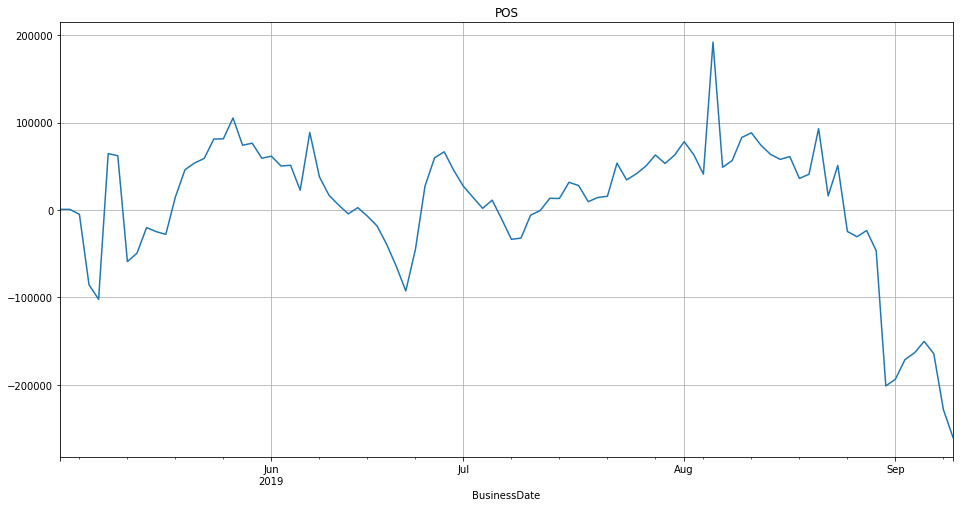

In [77]:
df_sedol2_edit['Position_Quantity_SD'].plot.line(label='SEDOL2', figsize=(16,8), title='POS', grid=True)

In [78]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol2_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [79]:
data = df_sedol2_edit['Position_Quantity_SD'].values[indices]
data

array([[    732.,     732.,   -4902., ...,   16903.,    5703.,   -4402.],
       [    732.,   -4902.,  -85468., ...,    5703.,   -4402.,    2669.],
       [  -4902.,  -85468., -102202., ...,   -4402.,    2669.,   -7031.],
       ...,
       [  50113.,   62928.,   53219., ..., -163315., -150291., -164515.],
       [  62928.,   53219.,   62813., ..., -150291., -164515., -228391.],
       [  53219.,   62813.,   78214., ..., -164515., -228391., -260215.]])

In [80]:
X = data[:, :-1]
y = data[:, -1]

In [81]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [83]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

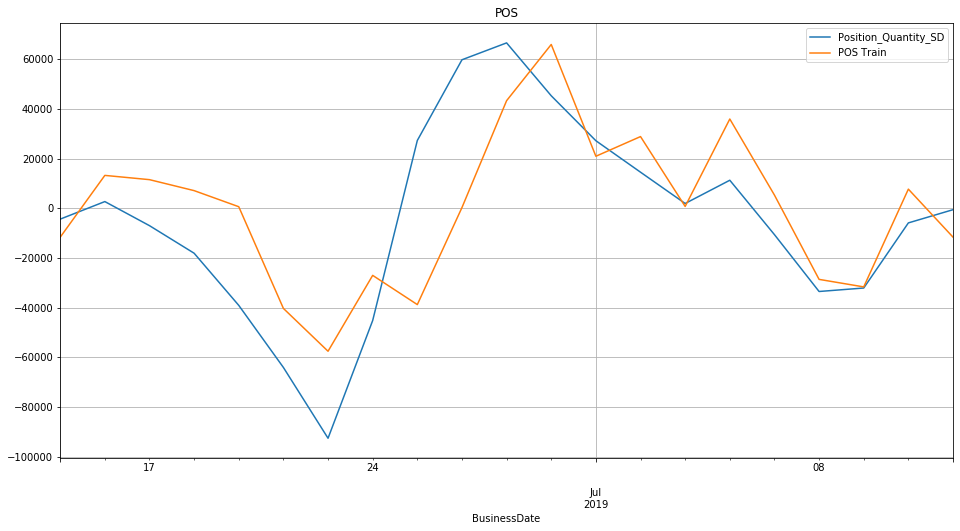

In [84]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol2_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL2', figsize=(16, 8), title='POS', grid=True)

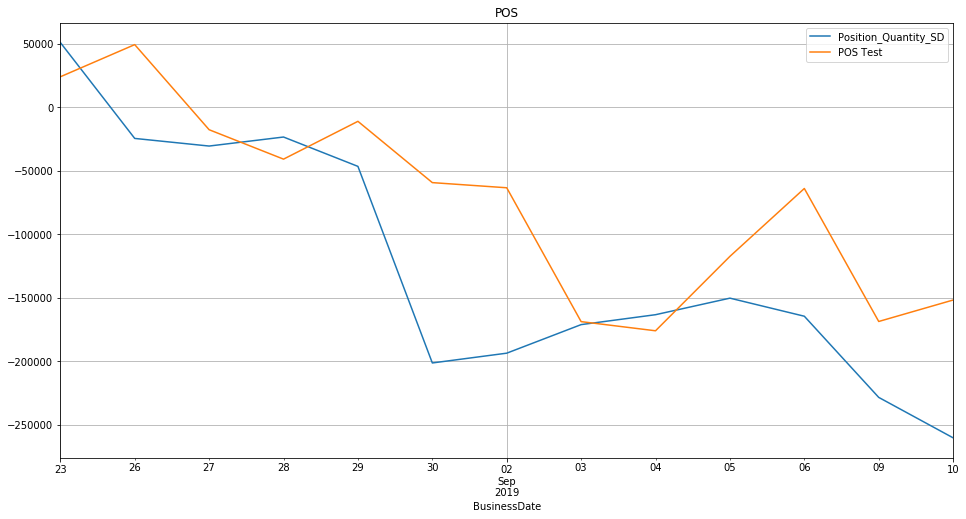

In [85]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol2_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL2', figsize=(16, 8), title='POS', grid=True)